In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [56]:
import torchvision.datasets as dset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import MultiStepLR
import models
from utils import progress_bar


def show_images(imgs):
    NUM = imgs.shape[0]

    sqrtn = int(np.ceil(np.sqrt(NUM)))
    sqrtimg = int(np.ceil(np.sqrt(NUM)))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(imgs):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img)
    return


#MNIST_DATA = fetch_mldata('MNIST original')

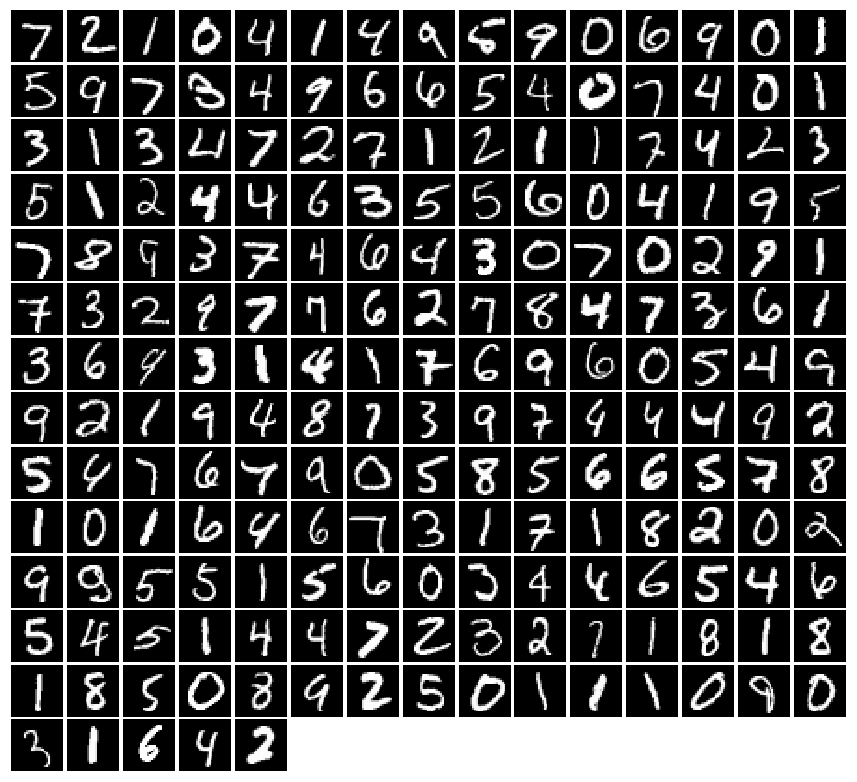

In [3]:
MNIST = dset.MNIST('../datasets/', train=False, download=True,transform=T.ToTensor())

BATCH_SIZE = 20 
train_loader = DataLoader(MNIST, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(MNIST, batch_size=200, shuffle=False)

imgs = train_loader.__iter__().next()[0].numpy().squeeze()
imgs = test_loader.__iter__().next()[0].numpy().squeeze()
show_images(imgs)

In [4]:
MNIST.test_data.numpy().reshape(10000,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
dtype = torch.FloatTensor
use_cuda =torch.cuda.is_available()
if use_cuda ==True:torch.cuda.FloatTensor

def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    best_acc =0
    best_val_loss= 100
    loss_hist = []
    train_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    e_s= 0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            #print(batch_y)
            #print(batch_x.size())
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(),batch_y.cuda()
            x = Variable(batch_x.view(BATCH_SIZE, 28*28))
            y = Variable(batch_y)
            _,_,out = net(x)
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 20==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        if(100.*correct/total > 98):
            torch.save(net.state_dict(), 'MLP.pth')
            return train_data

In [6]:
torch.cuda.is_available()

False

In [ ]:
net = models.MLP(input_dim=28*28, output_dim = 10)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0001, nesterov= True)
# optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9, weight_decay=0.0001, nesterov= True)
#optimizer = optim.Adam(net.parameters(), lr=0.005, weight_decay=0.002)
#scheduler = MultiStepLR(optimizer, [100, 150,200], gamma=0.1)
scheduler = MultiStepLR(optimizer, [5, 10], gamma=0.1)
# scheduler = ExponentialLR(optimizer,gamma=0.95)
# scheduler = ReduceLROnPlateau(optimizer, 'max', patience =3,min_lr= 0.00001)
#5e-3 86
if use_cuda:
    criterion.cuda()
    net.cuda()
#     resnet101 = torch.nn.DataParallel(resnet101, device_ids=range(torch.cuda.device_count()))
#     cudnn.benchmark = True   
hist= train(epoch=150,early_stopping= 20)

In [ ]:
def layer_info():


In [11]:
k=train_loader.__iter__().next()[0]

In [16]:
k.size()
#k =k.view(20,28*28)


torch.Size([20, 784])

In [7]:
#torch.save(net.state_dict(), 'resnet50_ang_loss.pth')
net = models.MLP(input_dim=28*28, output_dim = 10)
net.load_state_dict(torch.load('MLP.pth'))

In [8]:
ori_x= []
layer1=[]
layer2=[]
layer3=[]
true_label = []

for j,(batch_x, batch_y) in enumerate(test_loader):
    x = Variable(batch_x.view(200, 28*28))
    y = Variable(batch_y)
    x1,x2,x3 = net(x)
    
    ori_x.append(x.data.view(200,28*28).numpy())
    layer1.append(x1.data.view(200,1600).numpy())
    layer2.append(x2.data.view(200,1600).numpy())
    layer3.append(x3.data.view(200,10).numpy())
    true_label.append(y.data.numpy())
    
    
ori_x= np.concatenate(ori_x)
layer1=np.concatenate(layer1)
layer2=np.concatenate(layer2)
layer3=np.concatenate(layer3)
true_label =np.concatenate(true_label)

In [9]:
np.concatenate(layer1).shape
#np.concatenate(true_label).shape
#true_label

ntry =2e5
dis = np.zeros((int(ntry)))
print(dis.shape)
count =0
while(count != ntry):
    a = np.random.randint(0,1e4-1)
    b = np.random.randint(0,1e4-1)
    if(a!=b):
        dis[count] = np.linalg.norm(ori_x[a] -ori_x[b])**2
        count+=1
#     if count %1e4==0:
#         print('qwe')
SIGMA =np.median(dis)
#SIGMA = 104.94901171133142

(200000,)


In [11]:
SIGMA

104.98635551637062

In [45]:
projected_data = models.KPCA(layer1,n_components=10,sigma=50)

from sklearn import linear_model

logistic = linear_model.LogisticRegression()
logistic.fit(projected_data, true_label)

#logistic

[[ 1.00000012  0.34116375  0.47335783 ...,  0.40627661  0.38694981
   0.25804767]
 [ 0.34116375  1.          0.51001477 ...,  0.2664459   0.38094133
   0.3744069 ]
 [ 0.47335783  0.51001477  1.         ...,  0.48809135  0.52138442
   0.35849541]
 ..., 
 [ 0.40627661  0.2664459   0.48809135 ...,  1.          0.43937406
   0.28181562]
 [ 0.38694981  0.38094133  0.52138442 ...,  0.43937406  1.00000048
   0.28940475]
 [ 0.25804767  0.3744069   0.35849541 ...,  0.28181562  0.28940475
   0.99999982]]
Finished computing kernel matrix


KeyboardInterrupt: 

In [31]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
layer1_kpca = kpca.fit_transform(layer1)
#X_back = kpca.inverse_transform(X_kpca)

In [52]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
e_r = 0
for train_index, test_index in kf.split(layer1_kpca):
    logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
    logistic.fit(layer1_kpca[train_index], true_label[train_index])
    e_r += (1-np.mean(logistic.predict(layer1_kpca[test_index]) == true_label[test_index]))
e_r /=2

In [53]:
e_r

0.10559999999999997

In [35]:
layer1_kpca

array([[ 0.1703864 ,  0.19125284, -0.2681368 , ..., -0.11269384,
        -0.07548165,  0.07155173],
       [-0.13684443, -0.32508582,  0.06785168, ..., -0.03475527,
         0.00893053,  0.02077881],
       [-0.43725628,  0.07478812,  0.15709087, ...,  0.06936782,
        -0.14350845, -0.07961196],
       ..., 
       [ 0.0431509 ,  0.32590652,  0.07741888, ...,  0.05287905,
        -0.00367628,  0.13359439],
       [-0.14154483,  0.00617853,  0.03250463, ...,  0.06800474,
         0.00607199,  0.25356853],
       [ 0.2247216 , -0.18506573,  0.44008538, ..., -0.13450828,
         0.15872467,  0.09867068]], dtype=float32)

In [43]:
#np.sum(logistic.predict(projected_data) == true_label)
np.sum(logistic.predict(layer1_kpca) == true_label)

9251

In [37]:
logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
#logistic.fit(projected_data, true_label)
logistic.fit(layer1_kpca, true_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
logistic.predict_proba(projected_data)

array([[ 0.03938716,  0.03937476,  0.16048549, ...,  0.08745416,
         0.18584233,  0.16090529],
       [ 0.040831  ,  0.03755474,  0.16451546, ...,  0.0861518 ,
         0.18397657,  0.15766578],
       [ 0.04066402,  0.03697944,  0.15846964, ...,  0.08988064,
         0.17998505,  0.16266007],
       ..., 
       [ 0.03849706,  0.03848451,  0.16102316, ...,  0.09218855,
         0.17929135,  0.16397863],
       [ 0.04075299,  0.03849195,  0.16524703, ...,  0.09230444,
         0.17715135,  0.16316943],
       [ 0.03933689,  0.03799704,  0.16344291, ...,  0.0886913 ,
         0.18433885,  0.15936702]])

In [41]:
logistic.predict(layer1_kpca)

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
logistic.predict_proba(projected_data)[0]

array([ 0.09818019,  0.11288966,  0.10289311,  0.10089946,  0.09807107,
        0.08921688,  0.09535249,  0.10423888,  0.09704235,  0.10121591])

In [15]:
logistic.predict_proba(projected_data)[0]

array([ 0.09818017,  0.1128898 ,  0.10289317,  0.10089949,  0.09807111,
        0.08921688,  0.09535259,  0.10423852,  0.09704243,  0.10121584])

10000

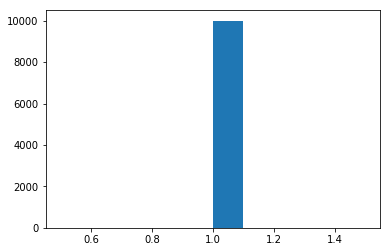

In [31]:
#plt.hist(logistic.predict_proba(projected_data))

plt.hist(logistic.predict(projected_data))

np.sum(logistic.predict(projected_data))

In [60]:
error_rate = {}


#row is layer and col is lr
lr_error_rate_upper = np.zeros((4,4))
lr_error_rate_lower = np.zeros((4,4))

for num, lr in enumerate([0.001,0.004,0.016,0.064]):
    net = models.MLP(input_dim=28*28, output_dim = 10)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=0.0001, nesterov= True)
    scheduler = MultiStepLR(optimizer,[12,24],gamma=0.1)
    if use_cuda:
        criterion.cuda()
        net.cuda()
    hist= train(epoch=150,early_stopping= 20)
    ori_x= []
    layer1=[]
    layer2=[]
    layer3=[]
    true_label = []
    
    for j,(batch_x, batch_y) in enumerate(test_loader):
        x = Variable(batch_x.view(200, 28*28))
        y = Variable(batch_y)
        x1,x2,x3 = net(x)

        ori_x.append(x.data.view(200,28*28).numpy())
        layer1.append(x1.data.view(200,1600).numpy())
        layer2.append(x2.data.view(200,1600).numpy())
        layer3.append(x3.data.view(200,10).numpy())
        true_label.append(y.data.numpy())


    ori_x= np.concatenate(ori_x)
    layer= {}
    
    layer['layer1']=np.concatenate(layer1)
    layer['layer2']=np.concatenate(layer2)
    layer['layer3']=np.concatenate(layer3)
    true_label =np.concatenate(true_label)
    
    #projected_data = models.KPCA(layer1,n_components=10,sigma=SIGMA)
    cout = 1
    for lay in ['layer1','layer2','layer3']:        
        kpca = KernelPCA(kernel="rbf", gamma=0.005,n_components=10)
        train_data = layer[lay]
        
        layer_kpca = kpca.fit_transform(train_data)
        logistic = linear_model.LogisticRegression()    
        logistic.fit(layer_kpca, true_label)
        error_rat= 1 - np.mean(logistic.predict(layer_kpca) == true_label)
        print('Error rate lower bound is ', error_rat)
        lr_error_rate_lower[num, cout] = error_rat
        
        #then compute upper bound
        kf = KFold(n_splits=2,random_state=1209)
        e_r = 0
        for train_index, test_index in kf.split(layer_kpca):
            logistic = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')
            logistic.fit(layer_kpca[train_index], true_label[train_index])
            e_r += (1-np.mean(logistic.predict(layer_kpca[test_index]) == true_label[test_index]))
        e_r /=2
        lr_error_rate_upper[num, cout] = e_r
        print('Error rate upper bound is ', e_r)
        cout+=1
        

    print('Finish this round')


This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 9s|Loss: 0.629 | Acc: 81.210% (8121/10000)0)

This is epoch:2
[========= 500/500 ======>]Step: 0ms| Tot: 9s1ms|Loss: 0.228 | Acc: 93.190% (9319/10000)

This is epoch:3
[========= 500/500 ======>]Step: 0ms| Tot: 8s5ms|Loss: 0.143 | Acc: 95.500% (9550/10000)

This is epoch:4
[========= 500/500 ======>]Step: 0ms| Tot: 7s9ms|Loss: 0.092 | Acc: 97.110% (9711/10000)

This is epoch:5
[========= 500/500 ======>]Step: 0ms| Tot: 8s9ms|Loss: 0.066 | Acc: 97.940% (9794/10000)

This is epoch:6
[========= 500/500 ======>]Step: 0ms| Tot: 8s5ms|Loss: 0.037 | Acc: 98.980% (9898/10000)
Error rate lower bound is  0.0867
Error rate upper bound is  0.1018
Error rate lower bound is  0.0085
Error rate upper bound is  0.0107
Error rate lower bound is  0.0133
Error rate upper bound is  0.015
Finish this round

This is epoch:1
[========= 500/500 ======>]Step: 0ms| Tot: 8s5ms|Loss: 0.436 | Acc: 86.550% (8655/10000)

This is epoch:2
[========= 500/500 ==

[========= 500/500 ======>]Step: 0ms| Tot: 8s4ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:52
[========= 500/500 ======>]Step: 0ms| Tot: 8s4ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:53
[========= 500/500 ======>]Step: 0ms| Tot: 8s9ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:54
[========= 500/500 ======>]Step: 0ms| Tot: 7s9ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:55
[========= 500/500 ======>]Step: 0ms| Tot: 7s8ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:56
[========= 500/500 ======>]Step: 0ms| Tot: 8s2ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:57
[========= 500/500 ======>]Step: 0ms| Tot: 8s1ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:58
[========= 500/500 ======>]Step: 0ms| Tot: 8s5ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:59
[========= 500/500 ======>]Step: 0ms| Tot: 8s4ms|Loss: nan | Acc: 9.800% (980/10000)

This is epoch:60


KeyboardInterrupt: 